In [158]:
%matplotlib inline
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf
from seaborn import plt
import seaborn as sns

from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets, feature_selection
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn import cross_validation
from sklearn import datasets
from sklearn import svm

from sklearn.metrics import roc_auc_score

In [22]:
bids = pd.read_csv("bids.csv")
bids.head(20)

#classification model - predict whether the purchase was made by robot or human

#initial thoughts on relationships
#certain auctions or certain merchandise could be more likely to be purchased by robots
#robot purchases will tend to come from the same phone
#robot purchases will tend to come from same ip address

#I'd like to see the count of each device, country, ip address, and type of merchandise
# can i look at the information within each column? count information
#Then I should look at these things in graph form. 

#this is the bidding information, but really, i need to train on the data set named train
#then see how correct i am with the test data
#then match up the training data with the bid data to see relationships

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3
5,5,e8291466de91b0eb4e1515143c7f74dexy2yr,3vi4t,mobile,phone7,9759243157894736,ru,91.107.221.27,vasstdc27m7nks3
6,6,eef4c687daf977f64fc1d08675c44444raj3s,kjlzx,mobile,phone2,9759243210526315,th,152.235.155.159,j9nl1xmo6fqhcc6
7,7,ab056855c9ca9d36390feae1fa485883issyg,f5f6k,home goods,phone8,9759243210526315,id,3.210.112.183,hnt6hu93a3z1cpc
8,8,d600dc03b11e7d782e1e4dae091b084a1h5ch,h7jjx,home goods,phone9,9759243210526315,th,103.64.157.225,vasstdc27m7nks3
9,9,a58ace8b671a7531c88814bc86b2a34cf0crb,3zpkj,sporting goods,phone4,9759243210526315,za,123.28.123.226,vasstdc27m7nks3


In [282]:
train = pd.read_csv("train.csv")
# I want to get rid of payment accoun and adress columns, as i dont think they're necessary
train_df_X = train.drop(['outcome'], 1)
train_df_y = train.drop(['bidder_id', 'payment_account', 'address'], 1)
#train_df_X
train

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0
5,7eaefc97fbf6af12e930528151f86eb91bafh,a3d2de7675556553a5f08e4c88d2c228yory1,5a1d8f28bc31aa6d72bef2d8fbf48b967hra3,0
6,25558d24bca82beef0f9db4ba1fe2045ynnvq,81580585d4dedd473da11aabf37fe9d4e2s2n,9a6d81115b9b653ba326eb510e9163b47drqj,0
7,88ae7a35e374a6fddd079ebb28c822eeohwse,a3d2de7675556553a5f08e4c88d2c2289zref,3a7e6a32b24aeab0688e91a41f3188e22iuec,0
8,57db69e32163f3e486dc6ef7d615aa12usje6,bf1c3151cc309308077ad0ccb99779ad12apw,31b95425d178b89fd7306762bb48bfb5n04sj,0
9,d1be739798ba0745a1fd72ac918a9f1929hei,f49162ea9903fc00e4721d2f7972df9d6az4s,5b1f6e97a1cc27cd7fa9a3fe17eccd2a6mpdv,0


In [248]:
#describe data
train_df_X.describe()

,bidder_id,payment_account,address
count,2013,2013,2013
unique,2013,2013,2013
top,45e4c7fe66077b5b7b338f19f476f9d85jlk0,33204cc71d422c3417bdd104dbb9d8a991a34,a3d2de7675556553a5f08e4c88d2c228zq50c
freq,1,1,1


In [249]:
#describe data
train_df_y.describe()

,outcome
count,2013.000000
mean,0.051167
std,0.220394
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [266]:
#mean of outcome
outcome_rate = train_df_y.mean()
print outcome_rate

# as percentage
print round(outcome_rate*100, 1), "%"
# so does this mean that 5.1% of the time it is a person, 95% of the time it is a robot? 
# This is assuming 0 means robot, and 1 means human

outcome    0.051167
dtype: float64
5.1 %


In [277]:
# how many zeros and how many ones in outcome?
num_zero = len(train[train['outcome']==0])
print "number of zeros is " + str(num_zero)

num_one = len(train[train['outcome']==1])
print "number of ones is " + str(num_one)

#sanity check
num_one+num_zero

number of zeros is 1910
number of ones is 103


2013

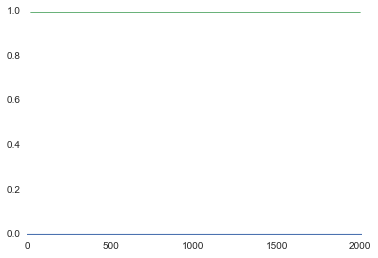

In [311]:
#how to plot these out?
fig, axes = plt.subplots(nrows = 1, ncols = 1)
train_df_y = train.outcome

colors = ['r', 'g']
for i in range(2):
    tmp = train_df_y[train.outcome == i]
    tmp.plot(colors[i])

In [318]:
skf = cross_validation.StratifiedKFold(train_df_y, n_folds = 5)
print len(skf)
print skf

5
sklearn.cross_validation.StratifiedKFold(labels=[ 0.  0.  0. ...,  0.  0.  0.], n_folds=5, shuffle=False, random_state=None)


In [319]:
#these are all the sections split into train/tests, yes?
for train_index, test_index in skf:
    print ("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

('TRAIN:', array([ 399,  400,  401, ..., 2010, 2011, 2012]), 'TEST:', array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,

In [314]:
scores = []
for n in n_neighbors:
    clf = neighbors.KNeighborsClassifier(n)
    clf.fit(X_train, y_train)
    #roc_auc_score(X_test, y_test)
    scores.append(clf.score(X_test, y_test))  

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 402 while Y.shape[1] == 1611

In [309]:
test = pd.read_csv("test.csv")
# I want to get rid of payment accoun and adress columns, as i dont think they're necessary
test_df = test.drop(['address','payment_account'], 1)
test_df.head(10)

,bidder_id
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7
1,a921612b85a1494456e74c09393ccb65ylp4y
2,6b601e72a4d264dab9ace9d7b229b47479v6i
3,eaf0ed0afc9689779417274b4791726cn5udi
4,cdecd8d02ed8c6037e38042c7745f688mx5sf
5,d4aed439bdc854a56fc6cc3bdb986775w7hxw
6,ed591299b162a19ff77f0479495831b31hl1q
7,eebdee08b0f67283126ef60307f49680sb9va
8,6887f0abc4eb4c79eb0e23c48ceea186vjfih
9,37eb6e2979e66d4ce29a74ac1c8bc6a5lqs6t
